# Zonal means of U (ASC) vs T(500m). For OM2-01 RYF experiment

**Requirements:** The `conda/analysis3-22.07` (or later) module on the OOD or Gadi (or your own up-to-date cookbook installation).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from dask.distributed import Client
client = Client(n_workers=os.cpu_count()-2, threads_per_worker=1)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41987 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41987/status,
Dashboard: /proxy/41987/status,Workers: 54
Total threads: 54,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37431,Workers: 54
Dashboard: /proxy/41987/status,Total threads: 54
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:33871,Total threads: 1
Dashboard: /proxy/36923/status,Memory: 2.32 GiB
Nanny: tcp://127.0.0.1:43701,


In [1]:
import cosima_cookbook as cc
session = cc.database.create_session()

I will use the "01deg_jra55v13_iaf_cicle3" experiment (Access-om2-01, repeated year forcing for the early 90's, forced with JRA atmospheric reanalysis)

In [2]:
experiment = '01deg_jra55v140_iaf_cycle3'
variable = 'theta'

varslist = cc.querying.get_variables(session, experiment = experiment)
varslist[varslist['name'].str.lower().str.contains('u')]

,name,long_name,units,frequency,ncfile,cell_methods,# ncfiles,time_start,time_end
5,ssu_i,None,None,None,output550/ocean/o2i.nc,None,244,None,None
17,ULAT,U grid center latitude,degrees_north,1 daily,output731/ice/OUTPUT/iceh.2018-12-daily.nc,None,732,1958-01-01 00:00:00,2019-01-01 00:00:00
18,ULON,U grid center longitude,degrees_east,1 daily,output731/ice/OUTPUT/iceh.2018-12-daily.nc,None,732,1958-01-01 00:00:00,2019-01-01 00:00:00
30,divu,strain rate (divergence),%/day,1 daily,output731/ice/OUTPUT/iceh.2018-12-daily.nc,time: mean,732,1958-01-01 00:00:00,2019-01-01 00:00:00
34,dxu,U cell width through middle,m,1 daily,output731/ice/OUTPUT/iceh.2018-12-daily.nc,None,732,1958-01-01 00:00:00,2019-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
282,dyu,ocean dyu on u-cells,m,static,output557/ocean/ocean-2d-dyu.nc,time: point,244,1900-01-01 00:00:00,1900-01-01 00:00:00
288,hu,ocean depth on u-cells,m,static,output692/ocean/ocean-2d-hu.nc,time: point,244,1900-01-01 00:00:00,1900-01-01 00:00:00
290,kmu,number of depth levels on u-grid,dimensionless,static,output701/ocean/ocean-2d-kmu.nc,time: point,244,1900-01-01 00:00:00,1900-01-01 00:00:00
293,xu_ocean,ucell longitude,degrees_E,static,output731/ocean/ocean-2d-drag_coeff.nc,None,1952,1900-01-01 00:00:00,2019-01-01 00:00:00


In [4]:
n=-60 #number of netcdfs to read
UVEL = cc.querying.getvar(experiment, 'u' , session, frequency='1 monthly')#,n=-60

In [3]:
#Getting variables
#variable = 'uvel'
n=-60 #number of netcdfs to read
UVEL = cc.querying.getvar(experiment, 'u' , session, frequency='1 monthly')#,n=-60
UVEL = UVEL.isel({'yu_ocean': slice(0, 494)}).isel({'st_ocean': slice(0, 40)})# First 500 m
TEMP = cc.querying.getvar(experiment, 'pot_temp' , session, frequency='1 monthly')
TEMP = TEMP.isel({'yt_ocean': slice(0, 494)}).isel({'st_ocean': slice(0, 40)})# First 500 m
dzt = cc.querying.getvar(experiment, 'dzt' , session, frequency='1 monthly')
dzt = dzt.isel({'yt_ocean': slice(0, 494)}).isel({'st_ocean': slice(0, 40)})
# To minimize computational efforts you can....
      # Set ylim to get only the Southermost Latitudes of the Southern Ocean (Lets say south of 60S)
      # Set a depth limit too.. perhaps 1000m or 500 m
      #When I calculate the mean it has to be a weighted mean against dzt
TEMP

<xarray.DataArray 'pot_temp' (time: 732, st_ocean: 40, yt_ocean: 494,
                              xt_ocean: 3600)>
dask.array<getitem, shape=(732, 40, 494, 3600), dtype=float32, chunksize=(1, 19, 135, 180), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -59.95 -59.9 -59.85
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 4.332 ... 423.7 468.4 517.6
  * time      (time) datetime64[ns] 1958-01-16T12:00:00 ... 2018-12-16T12:00:00
Attributes: (12/13)
    long_name:      Potential temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    ...             ...
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [8]:
UVEL

<xarray.DataArray 'u' (time: 732, st_ocean: 40, yu_ocean: 494, xu_ocean: 3600)>
dask.array<getitem, shape=(732, 40, 494, 3600), dtype=float32, chunksize=(1, 19, 135, 180), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 ... -59.92 -59.87 -59.82
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 4.332 ... 423.7 468.4 517.6
  * time      (time) datetime64[ns] 1958-01-16T12:00:00 ... 2018-12-16T12:00:00
Attributes: (12/13)
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_c
    ...             ...
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

2023-05-18 10:24:48,995 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:48,998 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,031 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,064 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,114 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,156 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,200 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,233 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,269 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,304 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,349 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,357 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,458 - distributed.nanny - WARNING - Restarting worker
2023-05-18 10:24:49,462 - distributed.

In [2]:
%%time
# Calculating Mean V and U along time
UVELzm = UVEL.sel({'xu_ocean': slice(-245, -235)}).mean('xu_ocean').compute()
UVELmean = UVELzm.mean('time')
dztmean = dzt.mean('time').compute()
TEMPzm = TEMP.sel({'xt_ocean': slice(-245, -235)}).mean('xt_ocean').compute()
TEMPmean = TEMPzm.mean('time')


In [6]:
# Plotting the mean U at the location of the 1000m bath
UVELzmin=UVELzm.min(dim='st_ocean').sel(yu_ocean=-65.46, method='nearest')
UVELzminv = UVELzmin.groupby('time.year').mean(dim='time')
TEMPzmin=TEMPzm.sel({'yt_ocean': slice(-80, -65.46)}).max(dim='st_ocean').mean(dim='yt_ocean')
TEMPzmv = TEMPzmin.groupby('time.year').mean(dim='time')

In [19]:
#heat transport obtained from  Corss-contour_tranport.ipynb
TIS_t=np.array([5247165.34578193, 3933204.06535512, 3144976.56418806,
       4646232.37079026, 5792116.66022007, 5657298.43281094,
       4922625.87529176, 5207557.42314105, 6205320.38946315,
       5764364.14271424, 4837322.3021007 , 5622672.86695565,
       4732352.36012004, 4661562.006002  , 6057242.7795932 ,
       5934963.033011  , 5448678.39679893, 4826541.30310103,
       4649817.40046682, 5729920.8642881 , 5791849.69123041,
       6193070.22074025, 6487649.73657886, 6384813.93264421,
       4505059.35578526, 4375546.58752918, 4624038.50083361,
       4334237.46582194, 5049867.18772924, 6424229.44448149,
       5915458.90230077, 5447818.47282427, 5031880.45881961,
       6821879.14371457, 5961052.55085028, 4200097.60853618,
       4247648.97365789, 4451187.22240747, 4949429.72990997,
       4854246.8582861 , 5155630.83694565, 4904371.34778259,
       5503112.04801601, 6064248.66688896, 5267446.45015005,
       4598069.86328776, 5074129.36045348, 4146756.14004668,
       4359673.74191397, 4818367.82927643, 4029737.74191397,
       4590060.13471157, 6055618.69423141, 5324554.75025008,
       4885958.60220073, 5134396.41747249, 5682264.10936979,
       4527625.39246415, 4337223.43714572, 3518783.31177059,
       5374184.99233078])

Text(0.5, 1.0, 'Totten Ice Shelf')

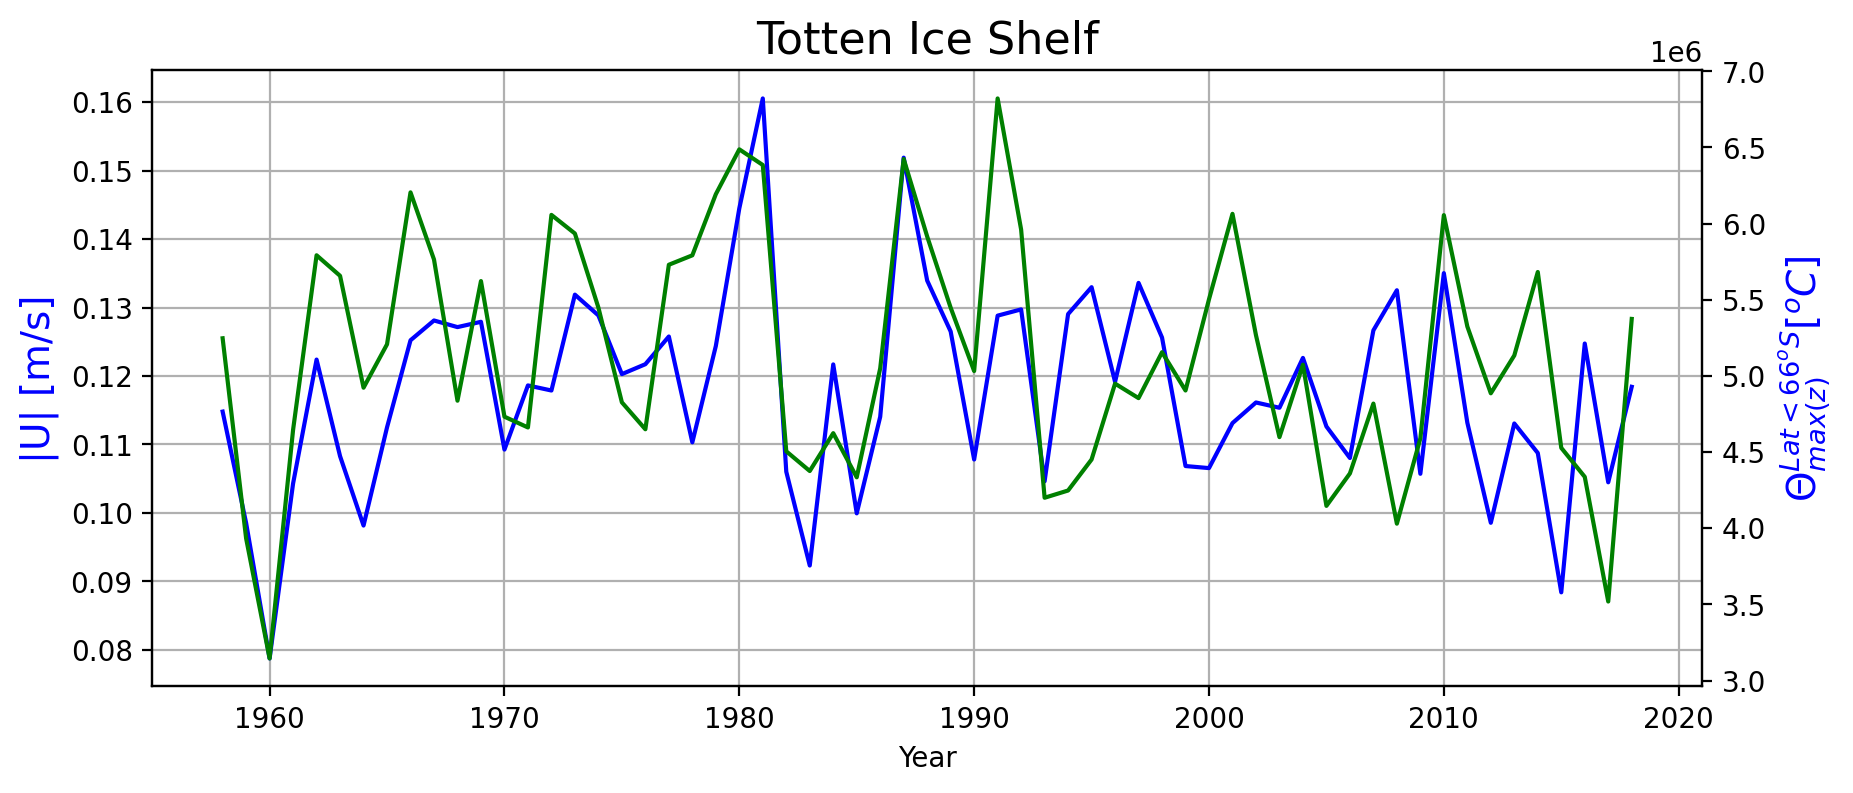

In [20]:
fig, ax1 = plt.subplots(figsize = (10, 4))
ax2 = ax1.twinx()

ax1.plot(np.linspace(1958,2018,61),-UVELzminv, 'b-')
#ax1.plot(UVELmeanz2['yt_ocean'].sel(yt_ocean=-65.46, method='nearest'), UVELmeanz2.sel(yt_ocean=-65.46, method='nearest'), 'k*')
ax1.set_xlabel('Year')
ax1.set_ylabel('|U| [m/s]', color='b', fontsize=14)
ax1.grid()
#Uvel
ax2.plot(np.linspace(1958,2018,61),TIS_t, 'g-')
#ax2.grid()
ax2.set_ylabel('$\Theta _{max(z)} ^{Lat<66^{o}S}$[$^{o}C$]', color='b', fontsize=14)
plt.title('Totten Ice Shelf', fontsize=16)

In [1]:
%%time
#For Amery ice Shelf
# Plotting the mean U at the location of the 1000m bath

# Calculating Mean V and U along time
UVELzma = UVEL.sel({'xu_ocean': slice(68, 80)}).mean('xu_ocean').compute()
UVELmeana = UVELzma.mean('time')
TEMPzma = TEMP.sel({'xt_ocean': slice(68, 80)}).mean('xt_ocean').compute()
TEMPmeana = TEMPzma.mean('time')



UVELzmina=UVELzma.min(dim='st_ocean').sel(yu_ocean=-66.77, method='nearest')
UVELzminva = UVELzmina.groupby('time.year').mean(dim='time')
TEMPzmina=TEMPzma.sel({'yt_ocean': slice(-80, -66.77)}).max(dim='st_ocean').mean(dim='yt_ocean')
TEMPzmva = TEMPzmina.groupby('time.year').mean(dim='time')

In [21]:
# Heat transport obtained from Corss-contour_tranport.ipynb
AIS_t=np.array([1.62921467e+09, 1.33207523e+09, 1.32670385e+09, 1.48685039e+09,
       1.41980087e+09, 1.50057468e+09, 1.56142800e+09, 1.75090924e+09,
       1.83412533e+09, 1.73392081e+09, 1.32855033e+09, 1.82863345e+09,
       1.66262130e+09, 1.30565654e+09, 1.40776126e+09, 1.32704607e+09,
       1.57327322e+09, 1.26864486e+09, 1.05232227e+09, 1.07736136e+09,
       1.39780530e+09, 1.53386547e+09, 1.67798023e+09, 1.97647373e+09,
       1.51012968e+09, 1.71296050e+09, 1.38063939e+09, 1.45951118e+09,
       1.48979078e+09, 1.53784953e+09, 1.68613268e+09, 1.38249608e+09,
       1.71328563e+09, 1.69932329e+09, 1.85969146e+09, 1.47761881e+09,
       1.36288442e+09, 1.36672902e+09, 1.57885340e+09, 1.35034715e+09,
       1.42281278e+09, 1.52698273e+09, 1.46274709e+09, 1.74246947e+09,
       1.78869695e+09, 1.76684744e+09, 1.45654395e+09, 1.42153889e+09,
       1.40496942e+09, 1.52209901e+09, 1.34460935e+09, 1.35381277e+09,
       1.55534826e+09, 1.61502336e+09, 1.36869281e+09, 1.75208540e+09,
       1.77194744e+09, 1.45864221e+09, 1.41371659e+09, 1.34386753e+09,
       1.57358127e+09])

Text(0.5, 1.0, 'Amery Ice Shelf')

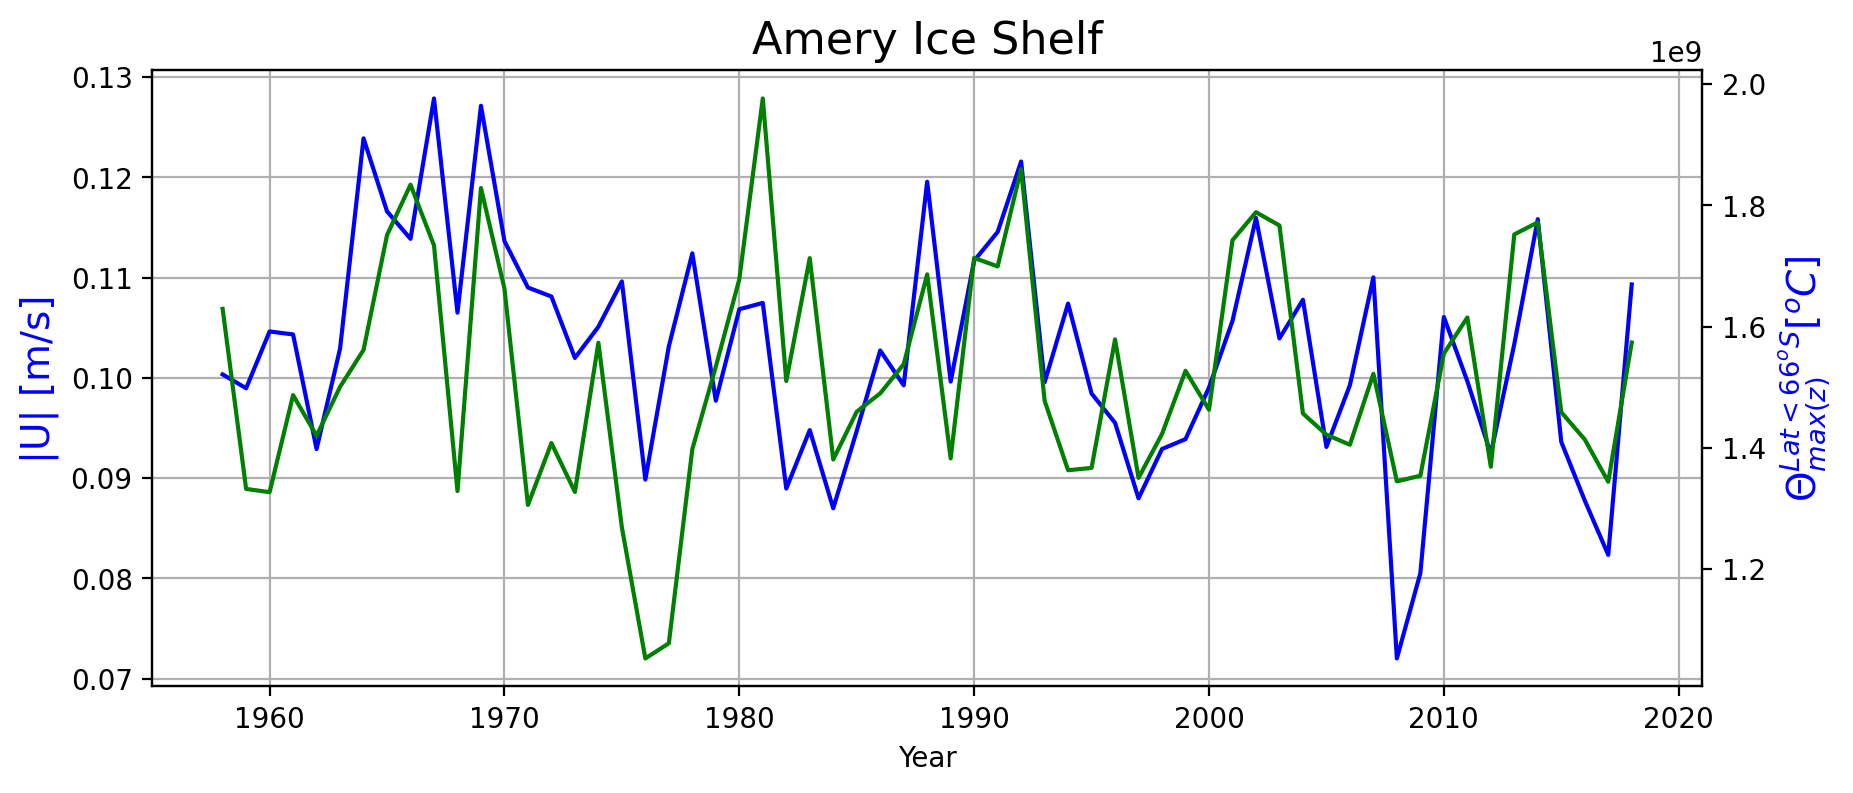

In [22]:
fig, ax1 = plt.subplots(figsize = (10, 4))
ax2 = ax1.twinx()

ax1.plot(np.linspace(1958,2018,61),-UVELzminva, 'b-')
#ax1.plot(UVELmeanz2['yt_ocean'].sel(yt_ocean=-65.46, method='nearest'), UVELmeanz2.sel(yt_ocean=-65.46, method='nearest'), 'k*')
ax1.set_xlabel('Year')
ax1.set_ylabel('|U| [m/s]', color='b', fontsize=14)
ax1.grid()
#Uvel
ax2.plot(np.linspace(1958,2018,61),AIS_t, 'g-')
#ax2.grid()
ax2.set_ylabel('$\Theta _{max(z)} ^{Lat<66^{o}S}$[$^{o}C$]', color='b', fontsize=14)
plt.title('Amery Ice Shelf', fontsize=16)

In [ ]:
#The correlation in both shelfs is pretty visible. However, it seems to suggets that the faster the ASC, the stronger the cross-shel heat transport gets. 
#This is unexpected to me.